In [82]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from  PIL import Image
import pathlib
import glob
import scrapy.pipelines.images
from tensorflow.keras import layers

In [83]:
# importing cats image 
cats = []
for cat in glob.glob('cat_dog/cat/*.jpg'):
    im=Image.open(cat)
    cats.append(im)

In [84]:
# importing dogs image 
dogs = []
for dog in glob.glob('cat_dog/dog/*.jpg'):
    im=Image.open(dog)
    dogs.append(im)

In [85]:
len(cats), len(dogs) 

(200, 200)

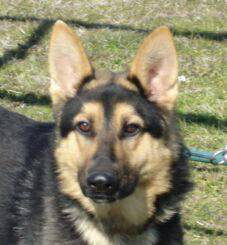

In [86]:
display(dogs[0])

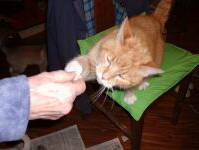

In [87]:
display(cats[0])

In [88]:
X = np.array([])
y = list()
categories = [cat, dog]

In [89]:
# for path, subdirs, files in os.walk("cat_dog"):
#      for name in files:
#             img_path = os.path.join(path,name)
#             correct_cat = subdirs
#             img_pixels = list(Image.open(img_path).getdata())
#             np.append(X, img_pixels)
#             y.append(correct_cat)
        

In [90]:
# image_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

In [91]:
# train_data_gen = image_generator.flow_from_directory(directory='train',
#                                                      subset='training')
# val_data_gen = image_generator.flow_from_directory(directory='train',
#                                                    subset='validation')

In [92]:
data_dir = pathlib.Path('./cat_dog')

In [93]:
data_dir

PosixPath('cat_dog')

In [94]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

400


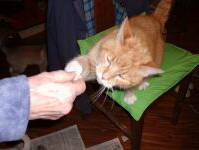

In [95]:
cats = list(data_dir.glob('cat/*'))
PIL.Image.open(str(cats[0]))

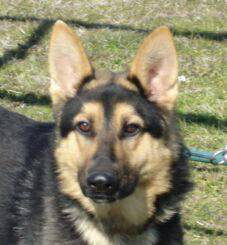

In [96]:
dogs = list(data_dir.glob('dog/*'))
PIL.Image.open(str(dogs[0]))

In [97]:
image_size=(180,180)
batch_size=16

In [98]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=image_size,
  batch_size=batch_size)

Found 400 files belonging to 2 classes.
Using 320 files for training.


In [99]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=image_size,
  batch_size=batch_size)

Found 400 files belonging to 2 classes.
Using 80 files for validation.


In [100]:
class_names = train_ds.class_names
print(class_names)

['cat', 'dog']


In [101]:
val_ds.class_names

['cat', 'dog']

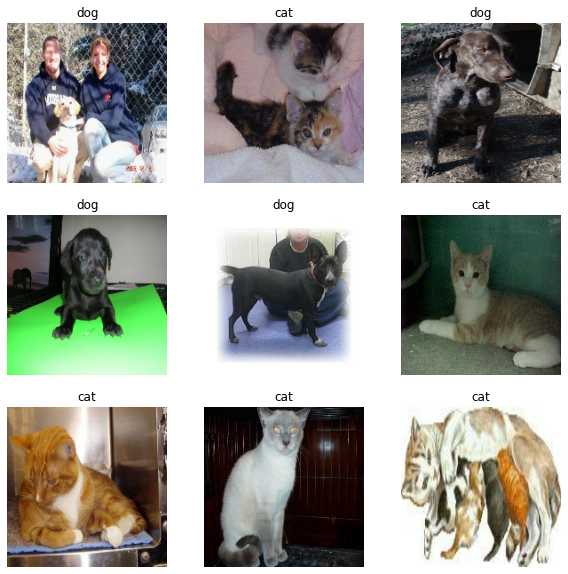

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

plt.savefig('./img/nine.jpg')

In [104]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(16, 180, 180, 3)
(16,)


In [105]:
# Batch
# the number of training point the model will look up for each time. 
# If batch size is small, training time takes longer but the quality of the model increases. (trade-off)
# example: grocery for mom 

In [106]:
# Epoch 
# the number of times the algorithm sees the entire dataset. 
# helps the nn get better 

In [107]:
# Iteraiton
# 1. forward propagation: sigmoid, etc. 
# 2. backward propagation:  update weights (modifying model? )

# So iteration is the process of forward propagation and backward. 

In [108]:
# RGB 255 range is too large. Let's standarize the data. 

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [109]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.00065343524 0.99901795


In [110]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [111]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [112]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [113]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
20/20 [==============================] - 4s 202ms/step - loss: 0.7246 - accuracy: 0.4938 - val_loss: 0.6936 - val_accuracy: 0.4750
Epoch 2/10
20/20 [==============================] - 3s 170ms/step - loss: 0.6936 - accuracy: 0.5375 - val_loss: 0.6888 - val_accuracy: 0.6250
Epoch 3/10
20/20 [==============================] - 3s 174ms/step - loss: 0.6829 - accuracy: 0.6031 - val_loss: 0.7053 - val_accuracy: 0.4750
Epoch 4/10
20/20 [==============================] - 3s 166ms/step - loss: 0.6442 - accuracy: 0.6938 - val_loss: 0.8564 - val_accuracy: 0.5250
Epoch 5/10
20/20 [==============================] - 3s 170ms/step - loss: 0.6776 - accuracy: 0.5938 - val_loss: 0.6873 - val_accuracy: 0.5625
Epoch 6/10
20/20 [==============================] - 3s 170ms/step - loss: 0.4942 - accuracy: 0.7625 - val_loss: 1.0279 - val_accuracy: 0.5375
Epoch 7/10
20/20 [==============================] - 3s 173ms/step - loss: 0.3905 - accuracy: 0.8438 - val_loss: 0.9430 - val_accuracy: 0.5750
Epoch 